In this notebook, we show the simulation for the Group Two design.

We show how our algorithms performance on identifying multiple arms, compared with mean based baseline algorithms. 
The make the comparison fair, the mean and 0.8-quantile reflects the same arm preference order. 
We consider $K = 20$ arms with 15 arms A, 3 arm B and 2 arms C. The quality of arm is evaluated by 0.8-quantile ($\tau = 0.8$). The 2 optimal arms are replicated Arm $C$. 

This experiment is designed to show that quantiles can provide a larger minimum gap, the minimum gap (between optimal set $\mathcal{S}^\ast$ and non-optimal set) for 0.8-quantiles is 1.21, while it is 0.4 for mean. We expect the quantile-based algorithms has a better performance. 

In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
from ipywidgets import IntProgress
from IPython.display import display
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import pickle
from prettytable import PrettyTable

from codes.BAI_FixedBudget import *
from codes.Environment import Mixture_AbsGau, setup_env, Exp
from codes.SimulatedGames import simulate
from codes.plots import *

%matplotlib inline

In [2]:
# environment

environments = [
    {Mixture_AbsGau: [[0, 2, 0,1, 1], [3.5, 2, 0, 1, 1], 
                      [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], 
                      [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1],  
                     ],
     Exp: [[1/4], [1/4], [1/4], [1/4], [1/4]
     ]
    } # mu1, sigma1, mu2, sigma2, p
    
]

tau = 0.8 # quantile level
rewards_env_mean, true_ss_dict_mean, samples_mean = setup_env(environments, ['mean'])
rewards_env_quant, true_ss_dict_quant, samples_quant = setup_env(environments, ['quantile_0.8'])

{<class 'codes.Environment.Mixture_AbsGau'>: [[0, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1]], <class 'codes.Environment.Exp'>: [[0.25], [0.25], [0.25], [0.25], [0.25]]}
{<class 'codes.Environment.Mixture_AbsGau'>: [[0, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1]], <class 'codes.Environment.Exp'>: [[0.25], [0.25], [0.25], [0.25], [0.25]]}


In [3]:
true_ss_dict_mean

{'Mixture_AbsGau_[[0, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1]]Exp_[[0.25], [0.25], [0.25], [0.25], [0.25]]': defaultdict(list,
             {'mean': [1.5936233251236764,
               3.5605084053701175,
               3.5553158804094966,
               3.577631243056354,
               3.5722752985220008,
               3.566058008873963,
               1.5979111624458227,
               1.5926249314035499,
               1.5912483053281907,
               1.5953384830652506,
               1.6056526718053494,
               1.5917361005566952,
               1.595402341805494,
               1.5911761492458583,
               1.5903922843096348,
               1.6043192227768628,
   

In [4]:
true_ss_dict_quant

{'Mixture_AbsGau_[[0, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1]]Exp_[[0.25], [0.25], [0.25], [0.25], [0.25]]': defaultdict(list,
             {'quantile_0.8': [2.5769098338946574,
               5.197679410169029,
               5.175293643416382,
               5.185372896742006,
               5.1795681660324275,
               5.157966623682169,
               2.587392308542428,
               2.547419991463348,
               2.561743458137465,
               2.5733355038683916,
               2.5405740747302907,
               2.564602471138853,
               2.5877888298185376,
               2.5783267193828725,
               2.557399717821177,
               2.5585810476004065,
 

In [5]:
# run experiments

def run_exper(rewards_env, summary_stats, policy, epsilon, m, budget, num_exper, fixed_samples_list = None,policy_for_mean = False):
    for key in rewards_env.keys():
        name = key + '_' + str(num_exper)
        if policy_for_mean:
                policy_name = str(policy).split('.')[-1].split('\'')[0] + '-'
                policy_name = policy_name[2:]
                print(policy_name)
        else:
                policy_name = str(policy).split('.')[-1].split('\'')[0] + '-'

        subname = policy_name  + str(budget) 
        p = IntProgress(max = num_exper)
        p.description = 'Running'
        display(p)
        results[name][subname] = []

        result = simulate(rewards_env[key],summary_stats[key], policy, 
                epsilon, m, budget, num_exper, p, fixed_samples_list)
        results[name][subname].append(result)

## Fixed Budget

we consider the problem of ($\epsilon, m , \tau$)-best arm identification problem with $\epsilon = 0, m = 2, \tau = 0.8$ and a fixed budget $N$ = 3000. 
We show the performance of Q-UGapEb (with true problem complexity), Adaptive Q-UGapEb (Adp-Q-UGapEb, with estimated problem complexity).
We show the performance of the Q-SAR. 
We compare our algorithms with the two algorithms we adapted from, namely the U-GapEb  and the Q-SAR algorithms. 

In [6]:
# setting

results = defaultdict(dict)
est_Hs = defaultdict(dict)

num_arms = 20
num_exper = 500
budget = 3000
epsilon = 0
m = 5

est_L_flag = True # True: estimate the lower bound of hazard rate L; False: use the true L

In [7]:
for budget in [500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500]:
# for budget in [500]:
    # run_exper(rewards_env, true_ss_dict, Q_SAR_Simplified_Large_Margin, epsilon, m, budget, num_exper)

    # run_exper(rewards_env, true_ss_dict, Q_SAR, epsilon, m, budget, num_exper)

    run_exper(rewards_env_quant, true_ss_dict_quant, Q_SAR_Simplified, epsilon, m, budget, num_exper)

    run_exper(rewards_env_quant, true_ss_dict_quant, Q_SR, epsilon, m, budget, num_exper)

    run_exper(rewards_env_mean, true_ss_dict_mean, Q_SAR_Simplified, epsilon, m, budget, num_exper, policy_for_mean = True)

    run_exper(rewards_env_mean, true_ss_dict_mean, Q_SR, epsilon, m, budget, num_exper, policy_for_mean = True)

    # run_exper(rewards_env, true_ss_dict, OS_SAR_Simplified, epsilon, m, budget, num_exper)

    

IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

SAR_Simplified-


IntProgress(value=0, description='Running', max=500)

SR-


IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

SAR_Simplified-


IntProgress(value=0, description='Running', max=500)

SR-


IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

SAR_Simplified-


IntProgress(value=0, description='Running', max=500)

SR-


IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

SAR_Simplified-


IntProgress(value=0, description='Running', max=500)

SR-


IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

SAR_Simplified-


IntProgress(value=0, description='Running', max=500)

SR-


IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

SAR_Simplified-


IntProgress(value=0, description='Running', max=500)

SR-


IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

SAR_Simplified-


IntProgress(value=0, description='Running', max=500)

SR-


IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

SAR_Simplified-


IntProgress(value=0, description='Running', max=500)

SR-


IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

IntProgress(value=0, description='Running', max=500)

SAR_Simplified-


IntProgress(value=0, description='Running', max=500)

SR-


IntProgress(value=0, description='Running', max=500)

Budget  Probability of Error       std Policy
0    500                 0.828  0.037738  Q-SAR
1    500                 0.886  0.031781   Q-SR
2    500                 0.950  0.021794    SAR
3    500                 0.970  0.017059     SR
4    750                 0.702  0.045738  Q-SAR


,Budget,Probability of Error,std,Policy
0,500,0.828,0.037738,Q-SAR
1,500,0.886,0.031781,Q-SR
2,500,0.950,0.021794,SAR
3,500,0.970,0.017059,SR
4,750,0.702,0.045738,Q-SAR
5,750,0.816,0.038748,Q-SR
6,750,0.894,0.030784,SAR
7,750,0.950,0.021794,SR
8,1000,0.614,0.048683,Q-SAR
9,1000,0.744,0.043642,Q-SR


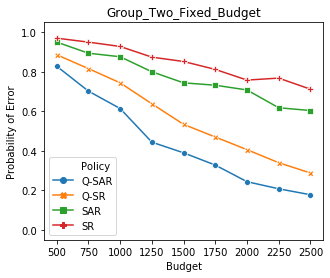

In [8]:
# save results

with open('../Group_Two_Fixed_Budget.pickle', 'wb') as handle:
     pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('../Group_Two_Fixed_Budget.pickle', 'rb') as handle:
    results = pickle.load(handle)

plot_eva_budget(results, 'pe', paper_flag = True, with_para = True, title = 'Group_Two_Fixed_Budget', log_scale = False)